In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135720 sha256=40c8a3f755910403cd4e915da5e247c462fa56113a58b3087318ced66e47a0cc
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/ce/84/33a31720d239d310cfff49d7bf56da412b6caefec2e112f327
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
gme = yf.Ticker("TSLA")
tesla_data = gme.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [20]:
data  = requests.get(url).text
print(data)


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
 "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html>
  <head>
    <title>403 Forbidden</title>
  </head>
  <body>
    <h1>Error 403 Forbidden</h1>
    <p>Forbidden</p>
    <h3>Error 54113</h3>
    <p>Details: cache-iad-kiad7000097-IAD 1697815084 759268881</p>
    <hr>
    <p>Varnish cache server</p>
  </body>
</html>



In [ ]:
soup = BeautifulSoup(data, 'html5lib')

In [21]:
tesla_data = pd.DataFrame(columns=["date", "Open", "high", "low", "close", "volume","Dividends","StockSplits"])

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_tesla_revenue(url):
    html_data = requests.get(url).text
    soup = BeautifulSoup(html_data, "html5lib")
    tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
    
    # Check if the "Tesla Quarterly Revenue" table is found
    revenue_table = soup.find('table', {'class': 'historical_data_table'})
    
    if revenue_table:
        rows = revenue_table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

        tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "")
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
        return tesla_revenue
    else:
        print("Table with Tesla Quarterly Revenue not found.")
        return None

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue_data = extract_tesla_revenue(url)

if tesla_revenue_data is not None:
    print(tesla_revenue_data.tail())

Table with Tesla Quarterly Revenue not found.


In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_tesla_revenue(url):
    html_data = requests.get(url).text
    soup = BeautifulSoup(html_data, "html5lib")
    tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
    
    # Check if the "Tesla Quarterly Revenue" table is found
    revenue_table = soup.find('table', {'class': 'historical_data_table'})
    
    if revenue_table:
        rows = revenue_table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

        tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "")
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
        return tesla_revenue
    else:
        print("Table with Tesla Quarterly Revenue not found.")
        return None

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_revenue_data = extract_tesla_revenue(url)

if tesla_revenue_data is not None:
    print(tesla_revenue_data.tail())

Table with Tesla Quarterly Revenue not found.


In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print(gme_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


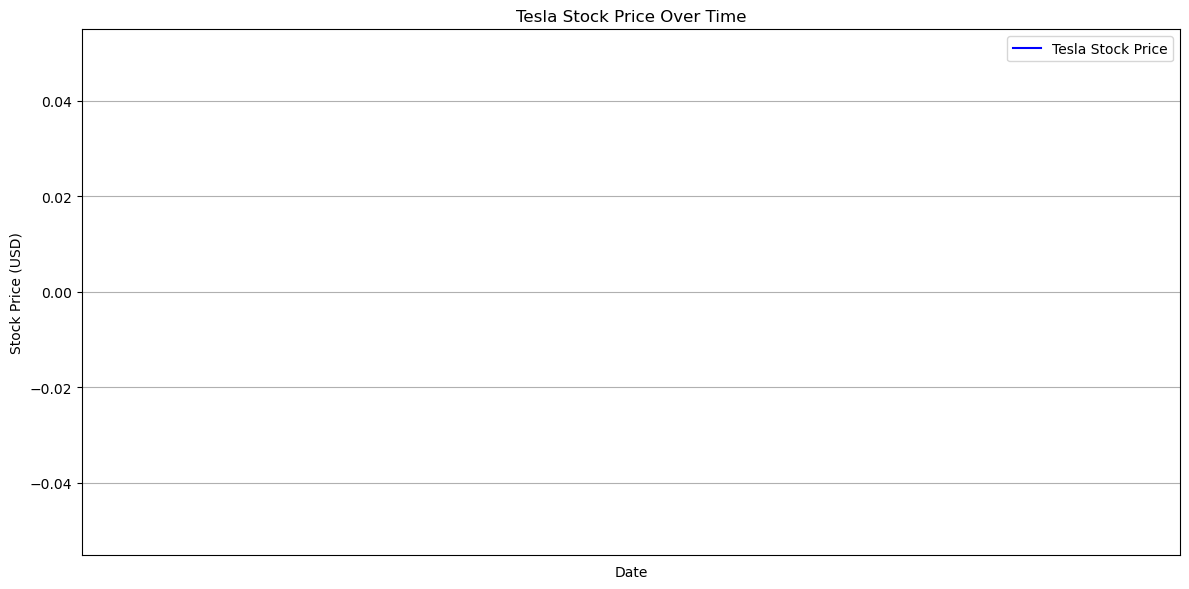

In [29]:
import matplotlib.pyplot as plt

# Define your data for Tesla stock (x should be date, y should be stock price)
x_data_tesla = tesla_data['Date']
y_data_tesla = tesla_data['Close']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_data_tesla, y_data_tesla, label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(x_data_tesla[::100], rotation=45)  # Show x-axis labels every 100 data points for readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue


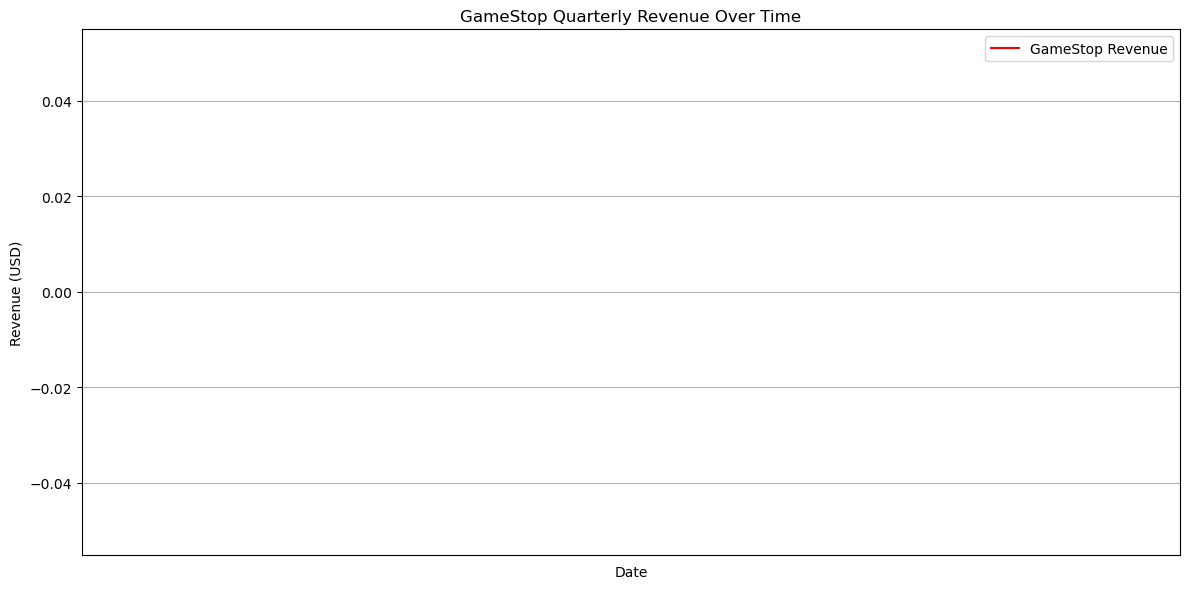

In [35]:
import matplotlib.pyplot as plt

# Define your data for GameStop stock (x should be date, y should be stock price)
x_data_gme = tesla_revenue['Date']
y_data_gme = tesla_revenue['Revenue']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_data_gme, y_data_gme, label='GameStop Revenue', color='red')
plt.title('GameStop Quarterly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.xticks(x_data_gme[::10], rotation=45)  # Show x-axis labels every 10 data points for readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

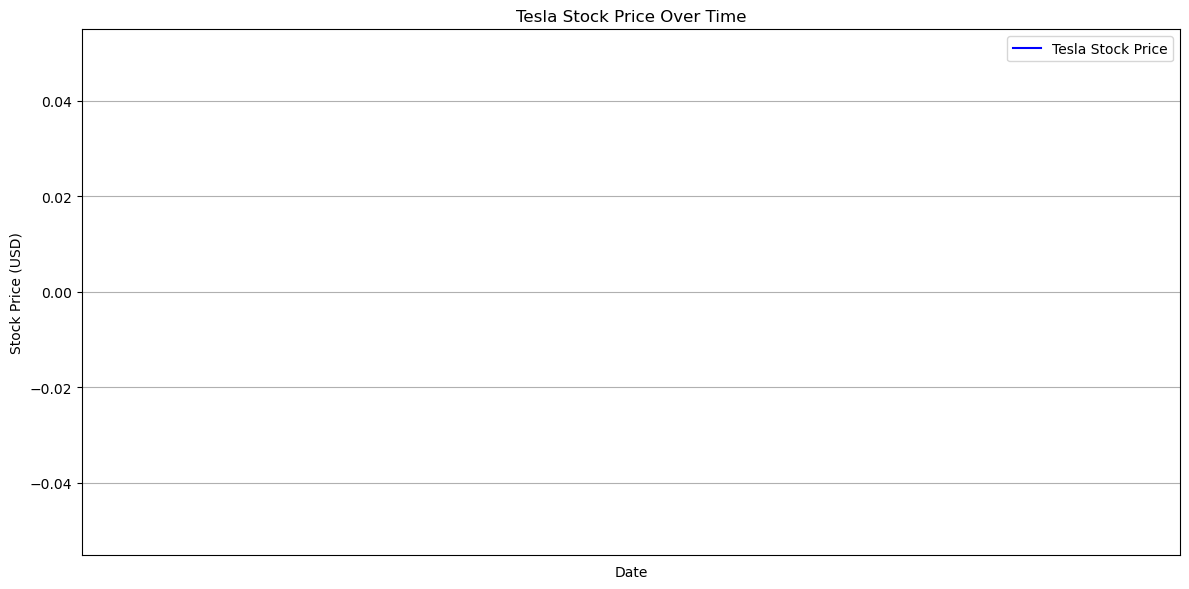

In [36]:
import matplotlib.pyplot as plt

# Define your data for Tesla stock (x should be date, y should be stock price)
x_data_tesla = tesla_data['Date']
y_data_tesla = tesla_data['Close']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_data_tesla, y_data_tesla, label='Tesla Stock Price', color='blue')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(x_data_tesla[::10], rotation=45)  # Show x-axis labels every 10 data points for readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
gme = yf.Ticker("TSLA")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


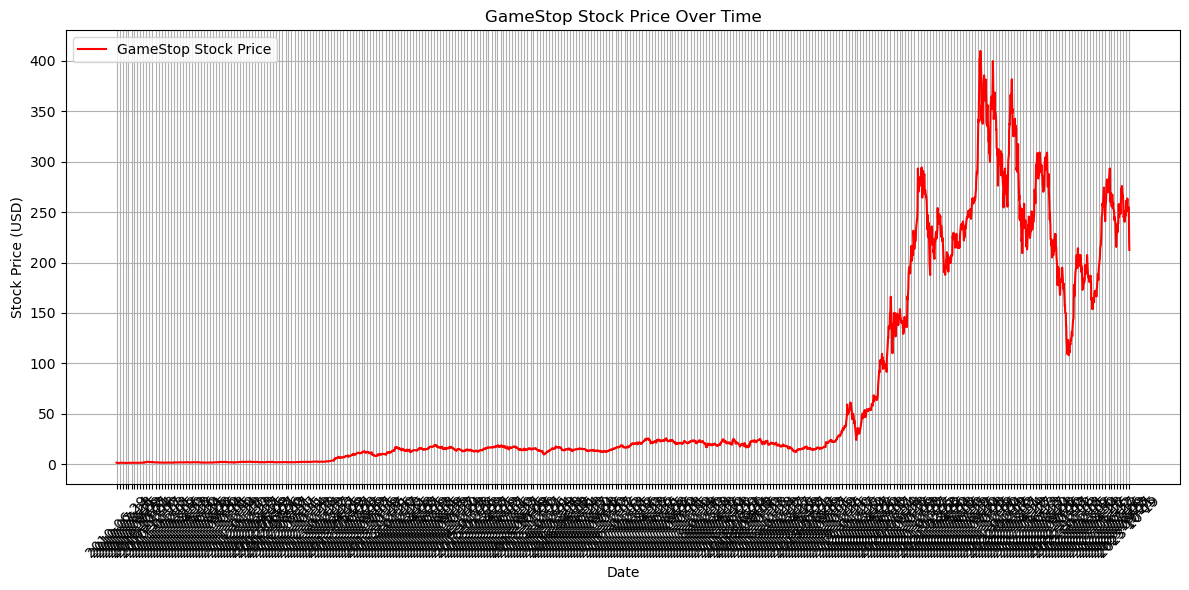

In [41]:
import matplotlib.pyplot as plt

# Define your data for GameStop stock (x should be date, y should be stock price)
x_data_gme = gme_data['Date']
y_data_gme = gme_data['Close']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_data_gme, y_data_gme, label='GameStop Stock Price', color='red')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(x_data_gme[::10], rotation=45)  # Show x-axis labels every 10 data points for readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()